In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
pip install opencv-python

In [11]:
import cv2

In [12]:
image_path = '/content/drive/MyDrive/SEM 6/IPCV/OpenCV/Exp2/Naruto.jpg'
img = cv2.imread(image_path)

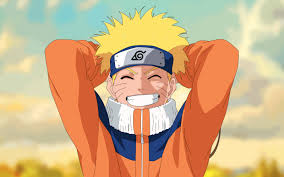

In [13]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [14]:
h,w = img.shape[:2]
print(h);
print(w)


177
284


In [15]:
for i in range(h):
  for j in range(w):
    image_pixel = img[i,j]
    print(f"[row][column]--{i}-{j}--------Pixel Value: {image_pixel}")

Streaming output truncated to the last 5000 lines.
[row][column]--159-112--------Pixel Value: [ 63  95 202]
[row][column]--159-113--------Pixel Value: [ 57  94 204]
[row][column]--159-114--------Pixel Value: [ 40  83 200]
[row][column]--159-115--------Pixel Value: [ 39  88 210]
[row][column]--159-116--------Pixel Value: [ 54 106 230]
[row][column]--159-117--------Pixel Value: [ 25  77 197]
[row][column]--159-118--------Pixel Value: [ 41  88 203]
[row][column]--159-119--------Pixel Value: [ 48  94 205]
[row][column]--159-120--------Pixel Value: [ 59  94 204]
[row][column]--159-121--------Pixel Value: [ 48  93 208]
[row][column]--159-122--------Pixel Value: [ 66 124 237]
[row][column]--159-123--------Pixel Value: [ 91 153 255]
[row][column]--159-124--------Pixel Value: [ 81 139 234]
[row][column]--159-125--------Pixel Value: [ 62 121 224]
[row][column]--159-126--------Pixel Value: [ 59 130 255]
[row][column]--159-127--------Pixel Value: [ 65 146 255]
[row][column]--159-128--------Pixel V

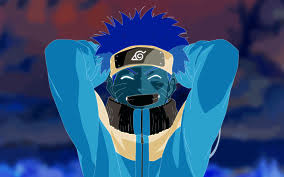

In [16]:
image_negative = img.copy()
for i in range(h):
  for j in range(w):
    pixel = img[i, j]
    image_negative[i, j] = 255 - pixel
cv2_imshow(image_negative)


In [17]:
max_pixel = img.max()
max_pixel

np.uint8(255)

In [18]:
min_pixel = img.min()
min_pixel

np.uint8(0)

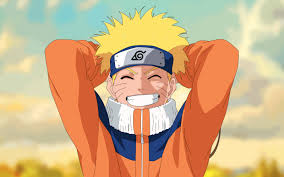

In [19]:
image_contrast = img.copy()
max_pixel = img.max()
min_pixel = img.min()


for i in range(h):
  for j in range(w):
    pixel = img[i, j]
    image_contrast[i, j] = ((pixel - min_pixel) / (max_pixel - min_pixel)) * 255

cv2_imshow(image_contrast)

Original Grayscale Image:


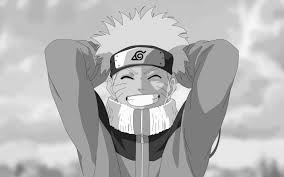

In [20]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print("Original Grayscale Image:")
cv2_imshow(grayscale_img)

Contrast Stretched Grayscale Image:


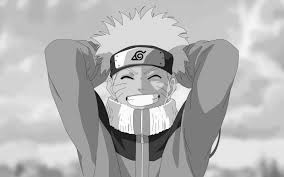

In [23]:

h_gray, w_gray = grayscale_img.shape

min_pixel_gray = np.min(grayscale_img)
max_pixel_gray = np.max(grayscale_img)

grayscale_contrast_stretched = np.zeros_like(grayscale_img, dtype=np.uint8)

for i in range(h_gray):
  for j in range(w_gray):
    pixel = grayscale_img[i, j]

    if (max_pixel_gray - min_pixel_gray) == 0:
      stretched_pixel = pixel
    else:
      stretched_pixel = ((pixel - min_pixel_gray) / (max_pixel_gray - min_pixel_gray)) * 255

    grayscale_contrast_stretched[i, j] = np.clip(stretched_pixel, 0, 255).astype(np.uint8)

print("Contrast Stretched Grayscale Image:")
cv2_imshow(grayscale_contrast_stretched)

Performing Bit Plane Slicing...
Bit Plane 0:


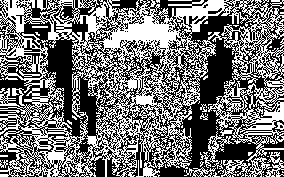

Bit Plane 1:


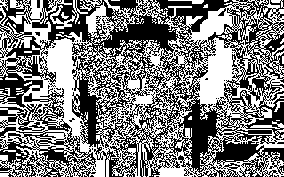

Bit Plane 2:


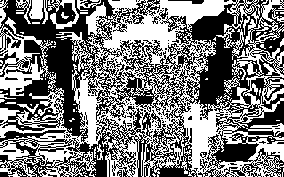

Bit Plane 3:


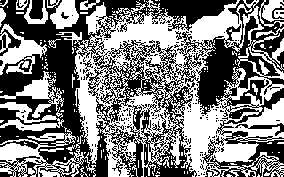

Bit Plane 4:


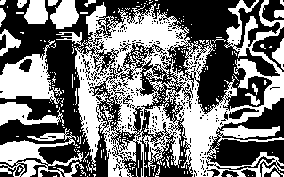

Bit Plane 5:


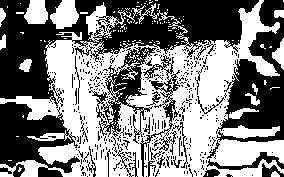

Bit Plane 6:


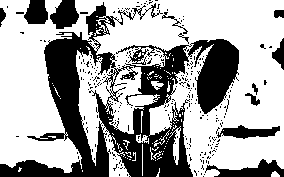

Bit Plane 7:


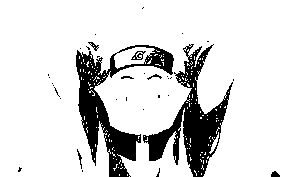

Bit Plane Slicing Complete.


In [25]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

print("Performing Bit Plane Slicing...")

for bit_plane in range(8):

  bit_plane_image = np.zeros_like(grayscale_img, dtype=np.uint8)

  bit_plane_image[grayscale_img & (1 << bit_plane) != 0] = 255

  print(f"Bit Plane {bit_plane}:")
  cv2_imshow(bit_plane_image)

print("Bit Plane Slicing Complete.")

Performing Gray Level Slicing for range [100, 150]...
Gray Level Slicing (With Background):


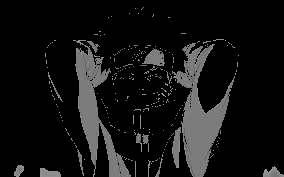

Gray Level Slicing (Without Background):


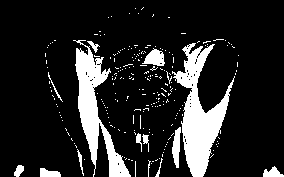

Gray Level Slicing Complete.


In [26]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

lower_bound = 100
upper_bound = 150

print(f"Performing Gray Level Slicing for range [{lower_bound}, {upper_bound}]...")

grayslice_with_background = grayscale_img.copy()
for i in range(grayscale_img.shape[0]):
  for j in range(grayscale_img.shape[1]):
    pixel = grayscale_img[i, j]
    if lower_bound <= pixel <= upper_bound:

      grayslice_with_background[i, j] = pixel
    else:

      grayslice_with_background[i, j] = 0

print("Gray Level Slicing (With Background):")
cv2_imshow(grayslice_with_background)


grayslice_without_background = np.zeros_like(grayscale_img, dtype=np.uint8)
for i in range(grayscale_img.shape[0]):
  for j in range(grayscale_img.shape[1]):
    pixel = grayscale_img[i, j]
    if lower_bound <= pixel <= upper_bound:

      grayslice_without_background[i, j] = 255
    else:

      grayslice_without_background[i, j] = 0

print("Gray Level Slicing (Without Background):")
cv2_imshow(grayslice_without_background)

print("Gray Level Slicing Complete.")